<a href="https://colab.research.google.com/github/ueki5/colaboratory/blob/main/playground-012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torchviz
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 76.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=19d887c0a1f3172161a65ca012d65b1cdb58d30e2107ecefb9b2a8f8788321c5
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


元データ： (506, 13) (506,)
項目名  ：  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']
絞込み後： (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]
入力次元数：1,出力次元数：1
labels.shape:torch.Size([506])
labels.shape:torch.Size([506, 1])


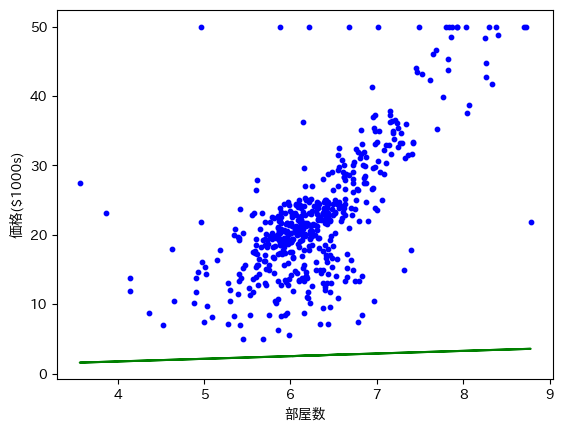

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch
from torchviz import make_dot
pd.set_option('display.width', 160)
np.set_printoptions(linewidth=160)

# 学習用データ準備
# --- http://lib.stat.cmu.edu/datasets/boston ---
#  The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
#  prices and the demand for clean air', J. Environ. Economics & Management,
#  vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
#  ...', Wiley, 1980.   N.B. Various transformations are used in the table on
#  pages 244-261 of the latter.

#  Variables in order:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's

#  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30
#   396.90   4.98  24.00
#  0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80
#   396.90   9.14  21.60
# ↑折り返しがあるため、２種類のデータになってしまっている

data_url = "http://lib.stat.cmu.edu/datasets/boston"
# データ説明の22行をスキップし、空白で分割
raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)
# 奇数行（CRIM ～ PTRATIO）
bef_wrapping = raw_df.values[ ::2, :]
# 偶数行（B ～ LSTAT）
aft_wrapping = raw_df.values[1::2, :2]
# 水平結合して１つのデータにする（CRIM ～ LSTAT）
x_org = np.hstack([bef_wrapping, aft_wrapping])
# MEDV
yt = raw_df.values[1::2, 2]
feature_names = np.array([
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
])

# 結果確認
print('元データ：', x_org.shape, yt.shape)
print('項目名  ： ', feature_names)

# データの絞込み（項目RMのみ）
x = x_org[:, feature_names == 'RM']
print('絞込み後：', x.shape)
print(x[:5, :])

# 正解データyの表示
print('正解データ')
print(yt[:5])

# # グラフ表示
# plt.scatter(x, yt, s=10, c='b')
# plt.xlabel('部屋数')
# plt.ylabel('価格($1000s)')
# plt.show()

# 変数定義

# 入力次元数
n_input = x.shape[1]

# 出力次元数
n_output = 1

print(f"入力次元数：{n_input},出力次元数：{n_output}")

# カスタムクラス
class Net(torch.nn.Module):
  # 初期化
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = torch.nn.Linear(n_input, n_output)

  # 予測関数
  def forward(self, x):
    x1 = self.l1(x)
    return x1

# 入力データ
inputs = torch.tensor(x).float()

# 教師データ
labels = torch.tensor(yt).float()
print(f"labels.shape:{labels.shape}")
# shapeを( 506 ) -> ( 506, 1)へ変更
labels = labels.view(-1, 1)
print(f"labels.shape:{labels.shape}")

# カスタムクラスを生成
net = Net(n_input, n_output)

# 予測計算
outputs = net(inputs)

# 損失関数
criterion = torch.nn.MSELoss()

# 誤差計算
loss = criterion(outputs, labels) / 2.0

# 勾配計算
loss.backward()

# 予測データを表示
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格($1000s)')
plt.plot(inputs.data, outputs.data, c='g')
plt.show()
